In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("cleaned_data_5250.csv")

In [5]:
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


<AxesSubplot: >

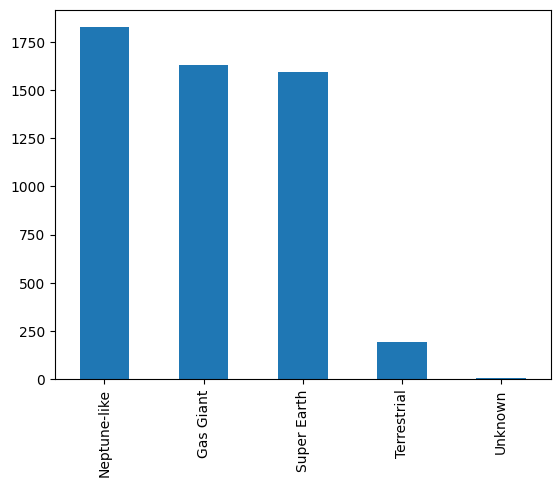

In [6]:
df['planet_type'].value_counts().plot(kind='bar')

In [8]:
#further data cleaning
#fill in missing values with mean value (drop missing objects)

df["distance"] = df['distance'].fillna(df['distance'].mean())
df["stellar_magnitude"] = df["stellar_magnitude"].fillna(df["stellar_magnitude"].mean())
df["mass_multiplier"] = df['mass_multiplier'].fillna(df['mass_multiplier'].mean())
df["radius_multiplier"] = df['radius_multiplier'].fillna(df['radius_multiplier'].mean())
df["orbital_radius"] = df['orbital_radius'].fillna(df['orbital_radius'].mean())

#drop objects
df = df.drop(columns=['mass_wrt', 'radius_wrt'])

name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_multiplier      0
radius_multiplier    0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
dtype: int64

In [9]:
##verification dataset
verify_df = df.copy()
verify_df = verify_df.drop(columns=["planet_type"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5250 non-null   float64
 2   stellar_magnitude  5250 non-null   float64
 3   discovery_year     5250 non-null   int64  
 4   mass_multiplier    5250 non-null   float64
 5   radius_multiplier  5250 non-null   float64
 6   orbital_radius     5250 non-null   float64
 7   orbital_period     5250 non-null   float64
 8   eccentricity       5250 non-null   float64
 9   detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 410.3+ KB


In [10]:
#splitting data
x = df.drop(['name','planet_type','detection_method'],axis=1)
dms = df[['name','detection_method']]
X_ = pd.get_dummies(dms)
X = pd.concat([x,X_],axis=1)
y = df['planet_type']

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
#model creation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [11]:
#using gradient-boosted classifier
gbm = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = gbm.predict(X_valid)
acc = accuracy_score(y_valid,y_pred)
print("Predicted planet type with", (acc * 100), "percent accuracy")

Predicted planet type with 95.33333333333334 percent accuracy
